In [1]:
! nvidia-smi

Sat Dec 23 13:30:51 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics
from IPython import display
import ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 5.8 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO
from IPython.display import display , Image

In [5]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cLGy7PeEKlkbudyAYJzg")
project = rf.workspace("mary-dhel-moonton-bnc07").project("gender_age")
dataset = project.version(2).download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.7 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.229, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Gender_Age-2 in yolov8:: 100%|██████████| 4970/4970 [00:00<00:00, 9752.43it/s] 


In [ ]:
%cd {HOME}
!yolo task=detect mode=train model=yolov8l.pt data=/content/Gender_Age-2/data.yaml epochs=70 imgsz=640


/content
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/Gender_Age-2/data.yaml, epochs=70, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxe

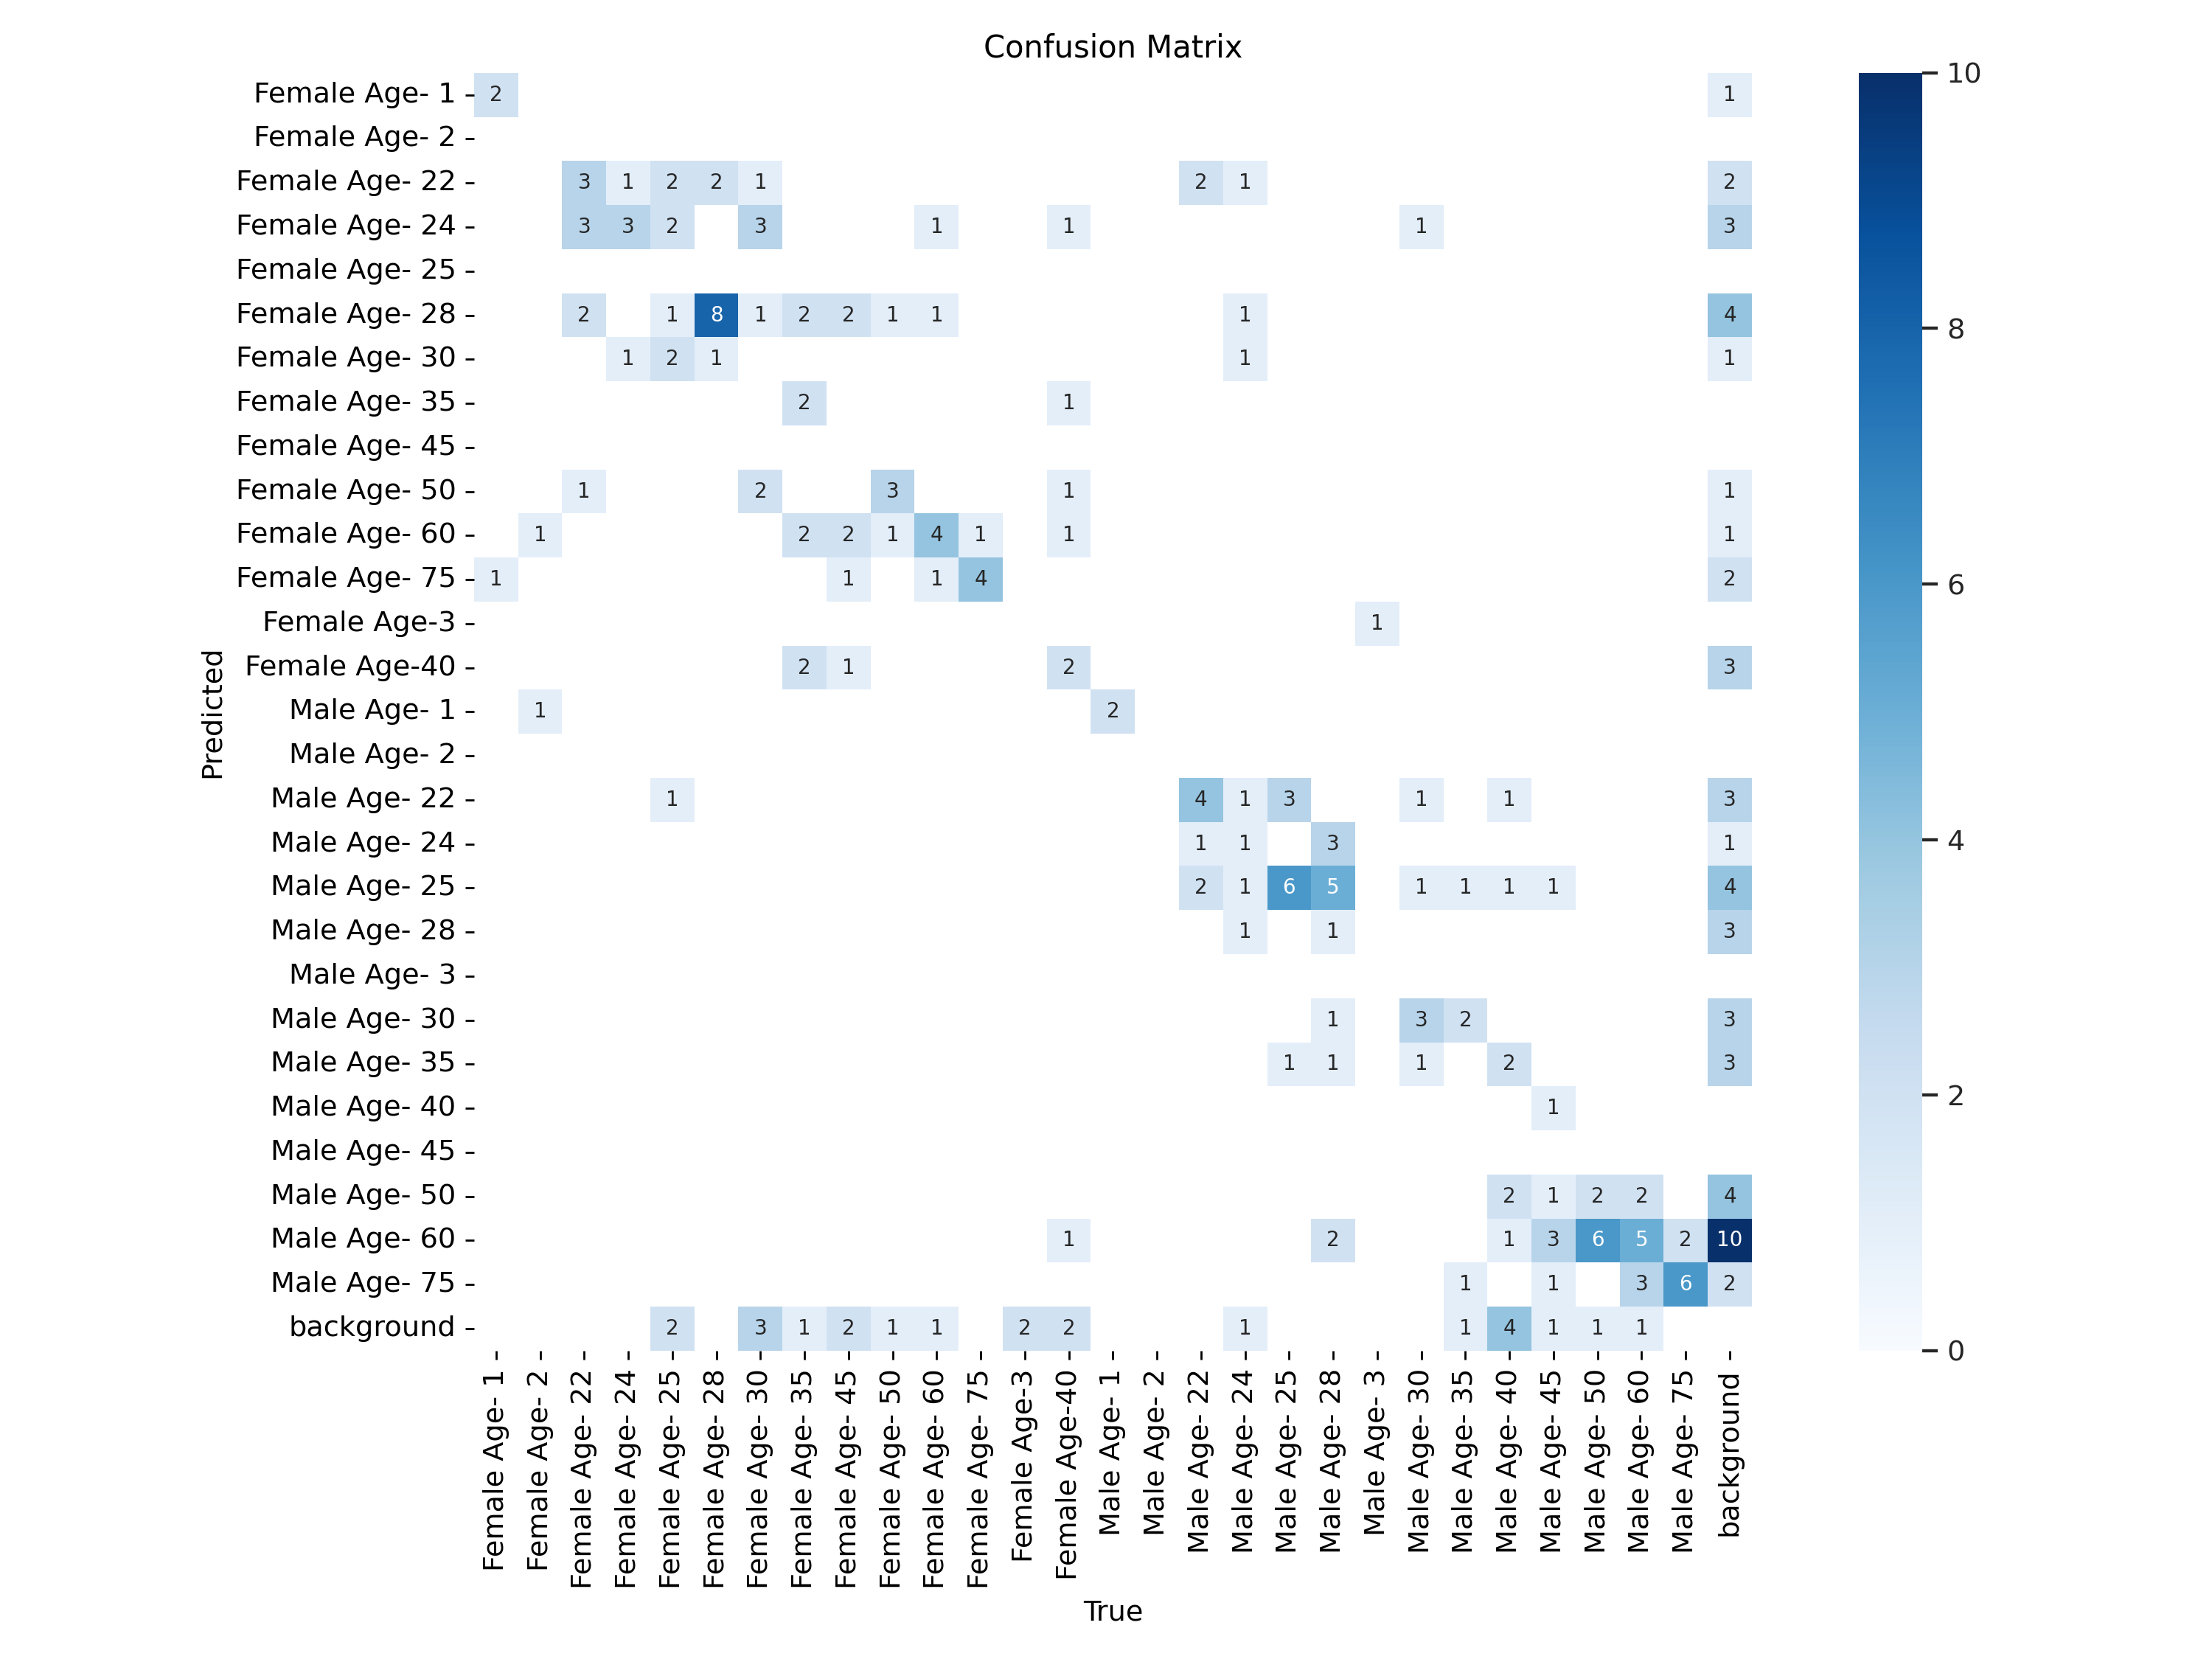

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png' , width=600)

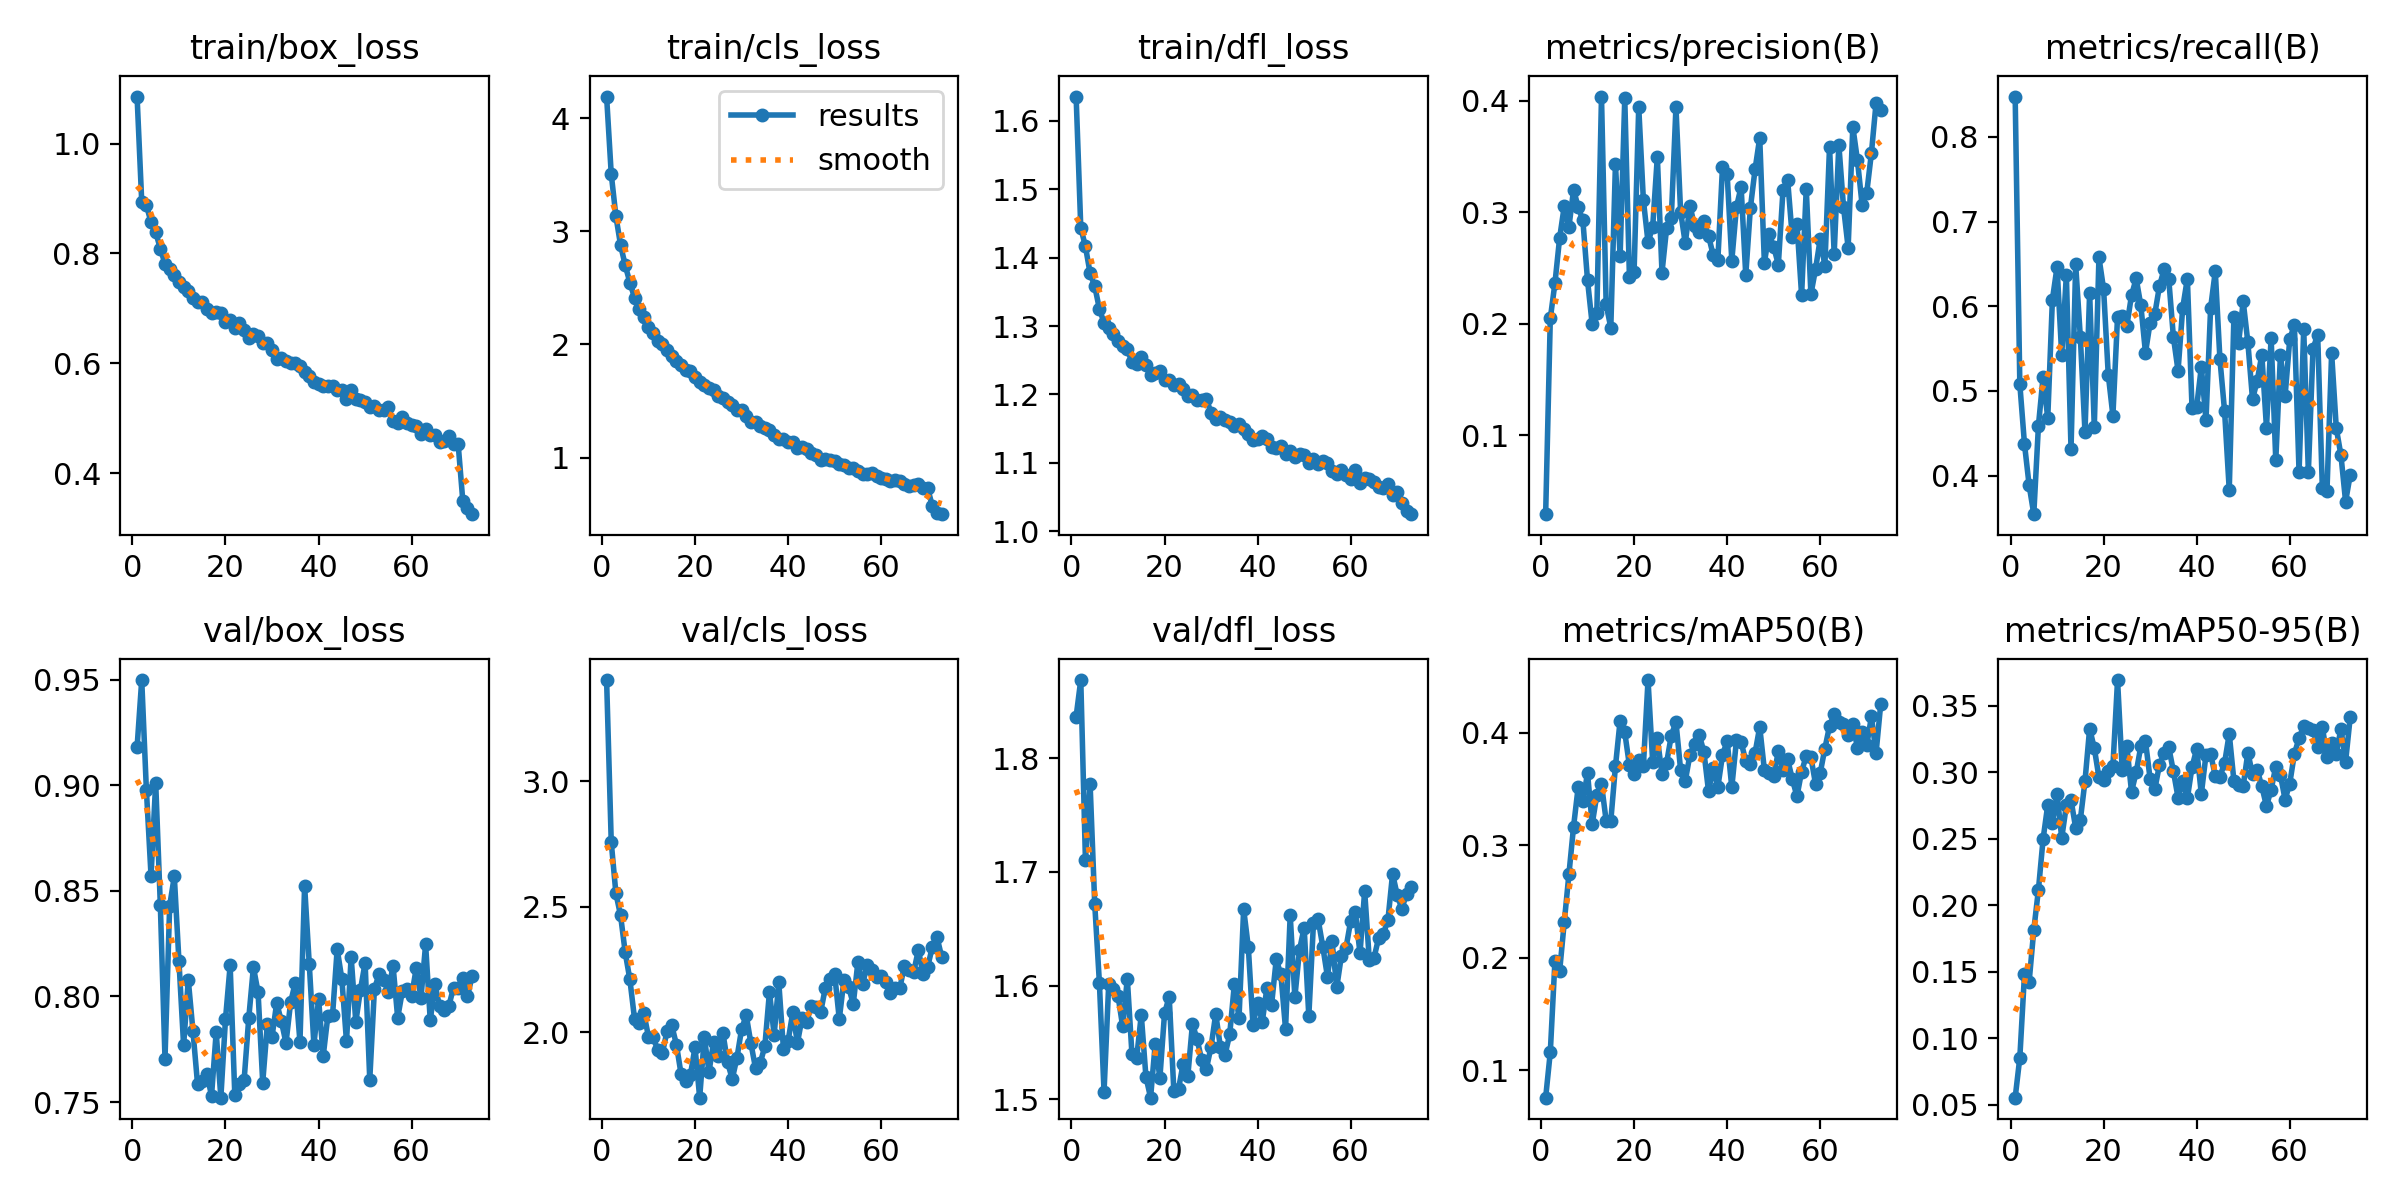

In [ ]:
Image(filename=f'{HOME}/runs/detect/train2/results.png' , width=600)

In [6]:
!yolo task=detect mode=val model=/content/run/best_f.pt data=/content/Gender_Age-2/data.yaml

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43628196 parameters, 0 gradients, 164.9 GFLOPs
100% 755k/755k [00:00<00:00, 25.0MB/s]
val: Scanning /content/Gender_Age-2/valid/labels... 199 images, 0 backgrounds, 0 corrupt: 100% 199/199 [00:00<00:00, 2076.63it/s]
val: New cache created: /content/Gender_Age-2/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 13/13 [00:11<00:00,  1.13it/s]
                   all        199        199      0.408      0.558      0.516      0.422
         Female Age- 1        199          3      0.433          1      0.995      0.723
         Female Age- 2        199          2          1          0      0.263      0.237
        Female Age- 22        199          9      0.518      0.444      0.493      0.377
        Female Age- 24        199          5      0.197        0.4       0.43      0.363
        Female Age- 25   

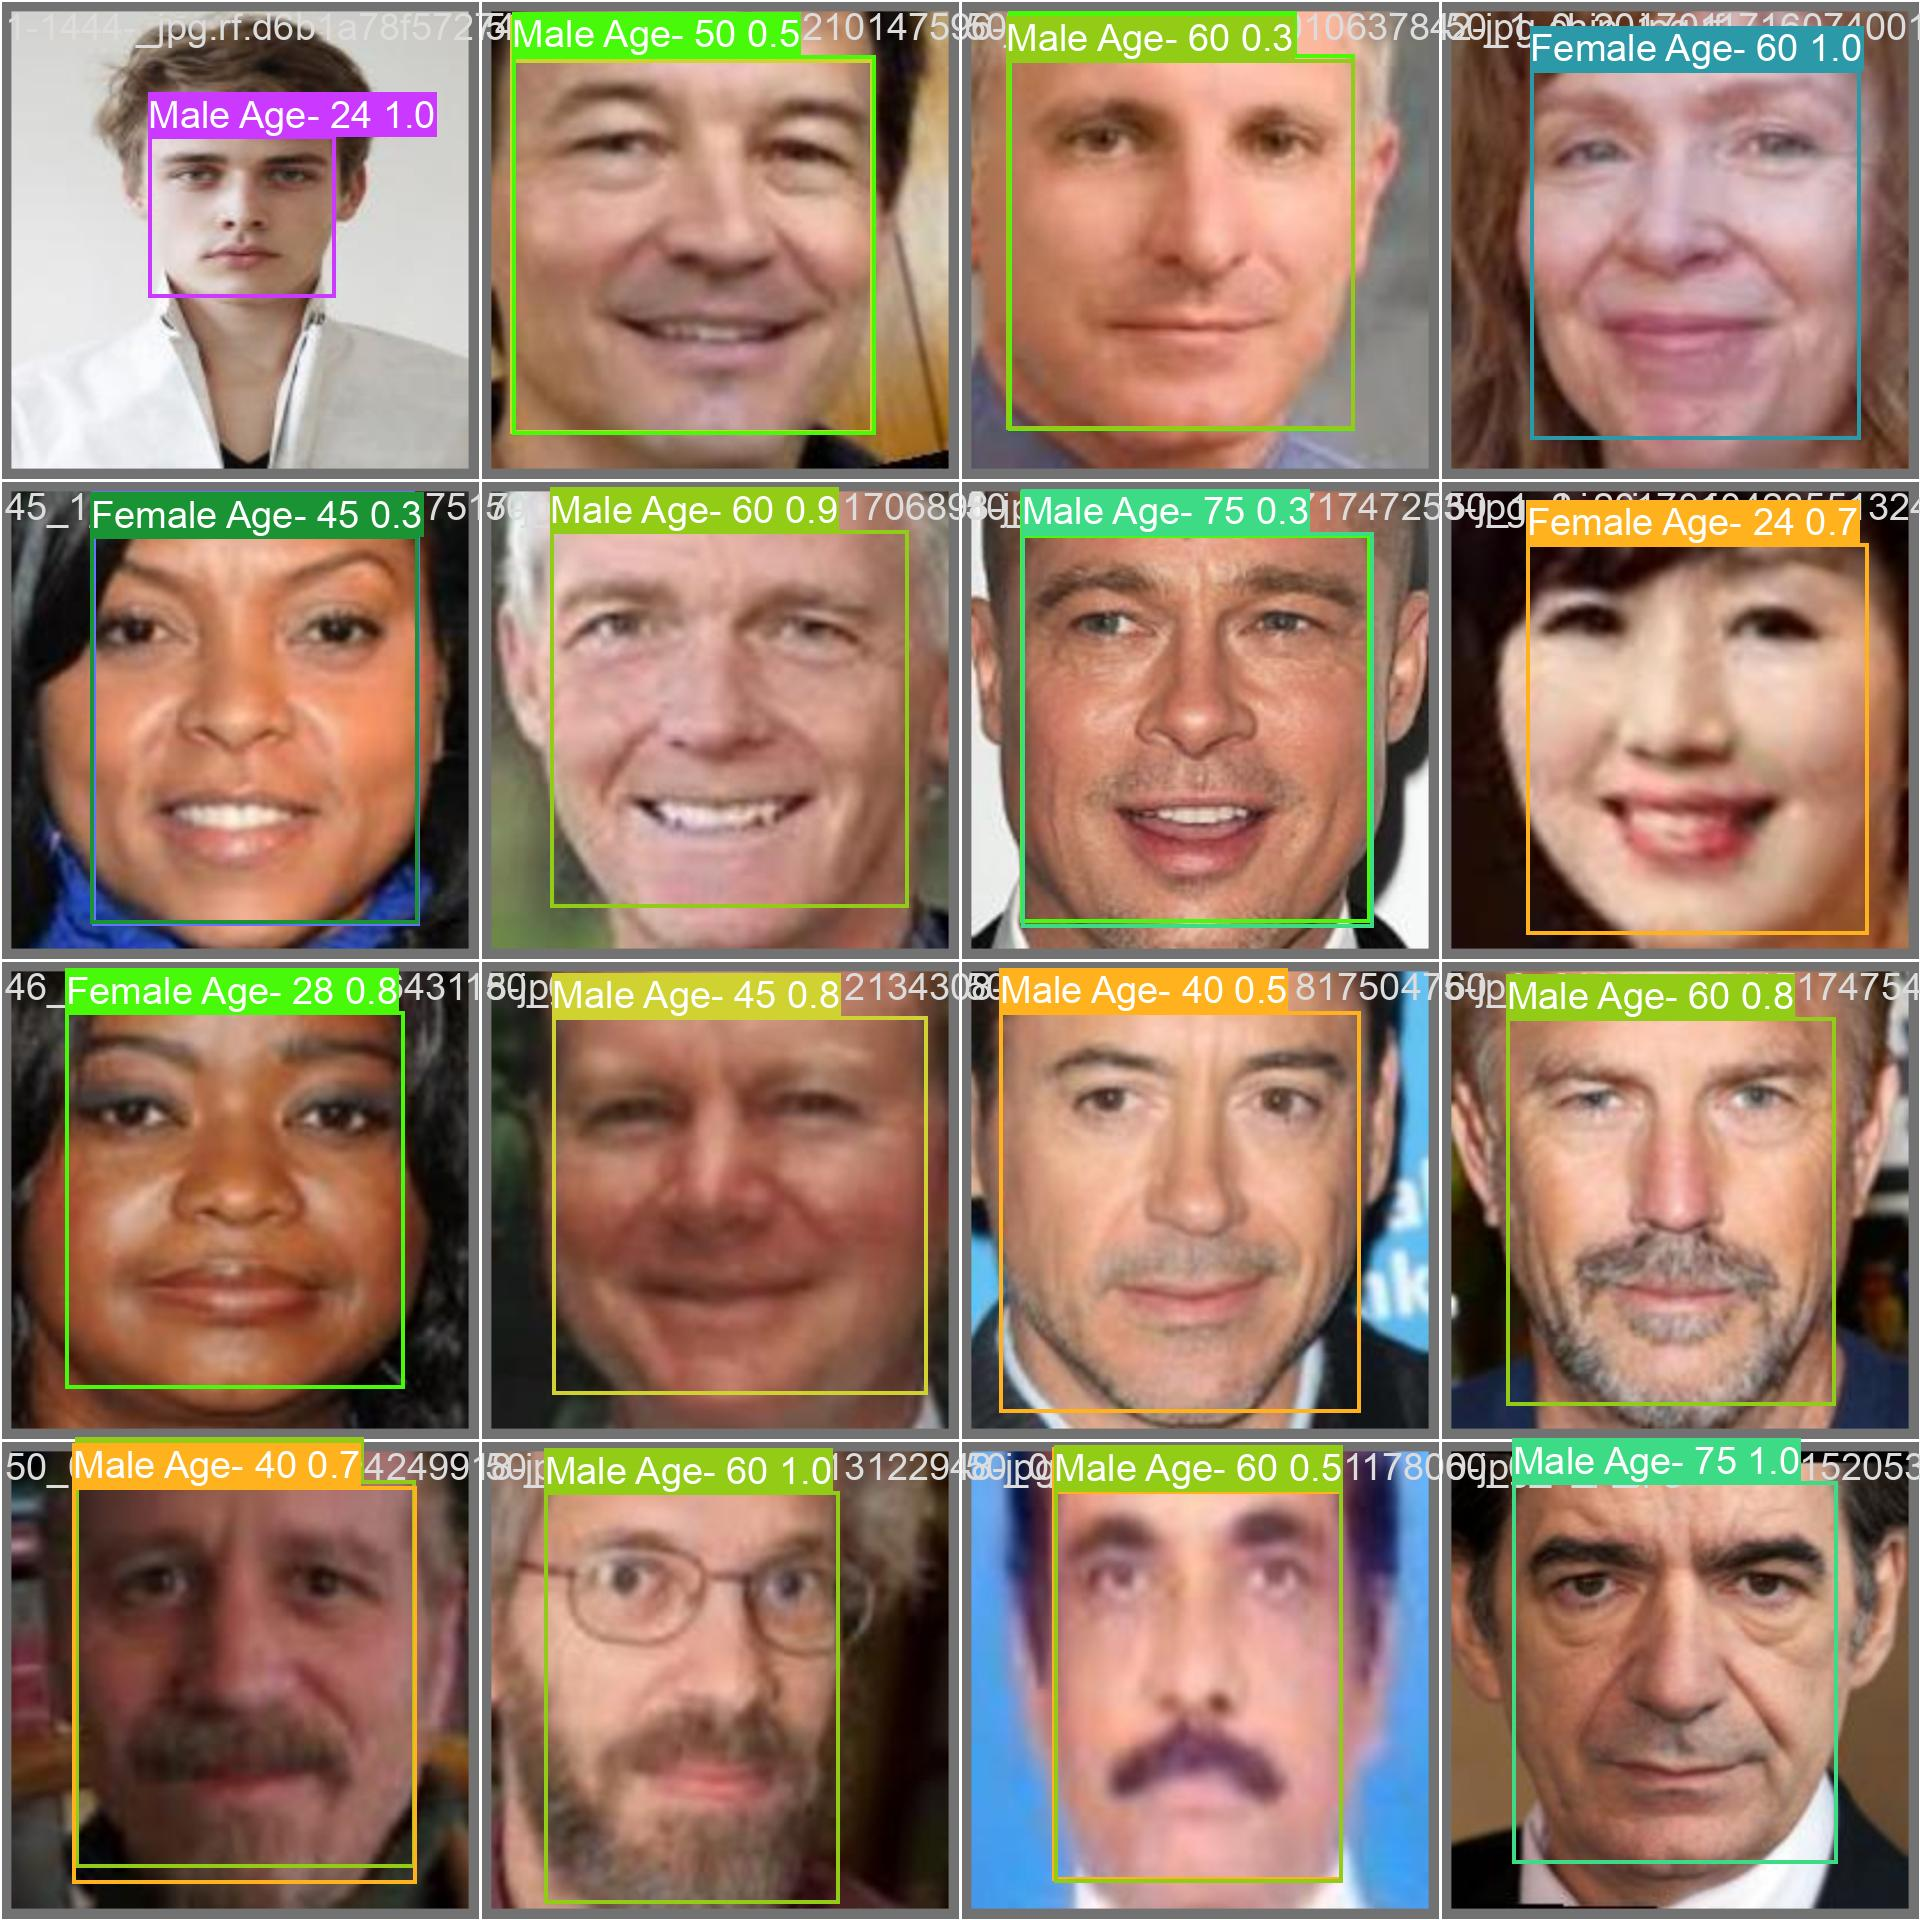

In [8]:
Image(filename=f'/content/runs/detect/val/val_batch0_pred.jpg' , width=600)

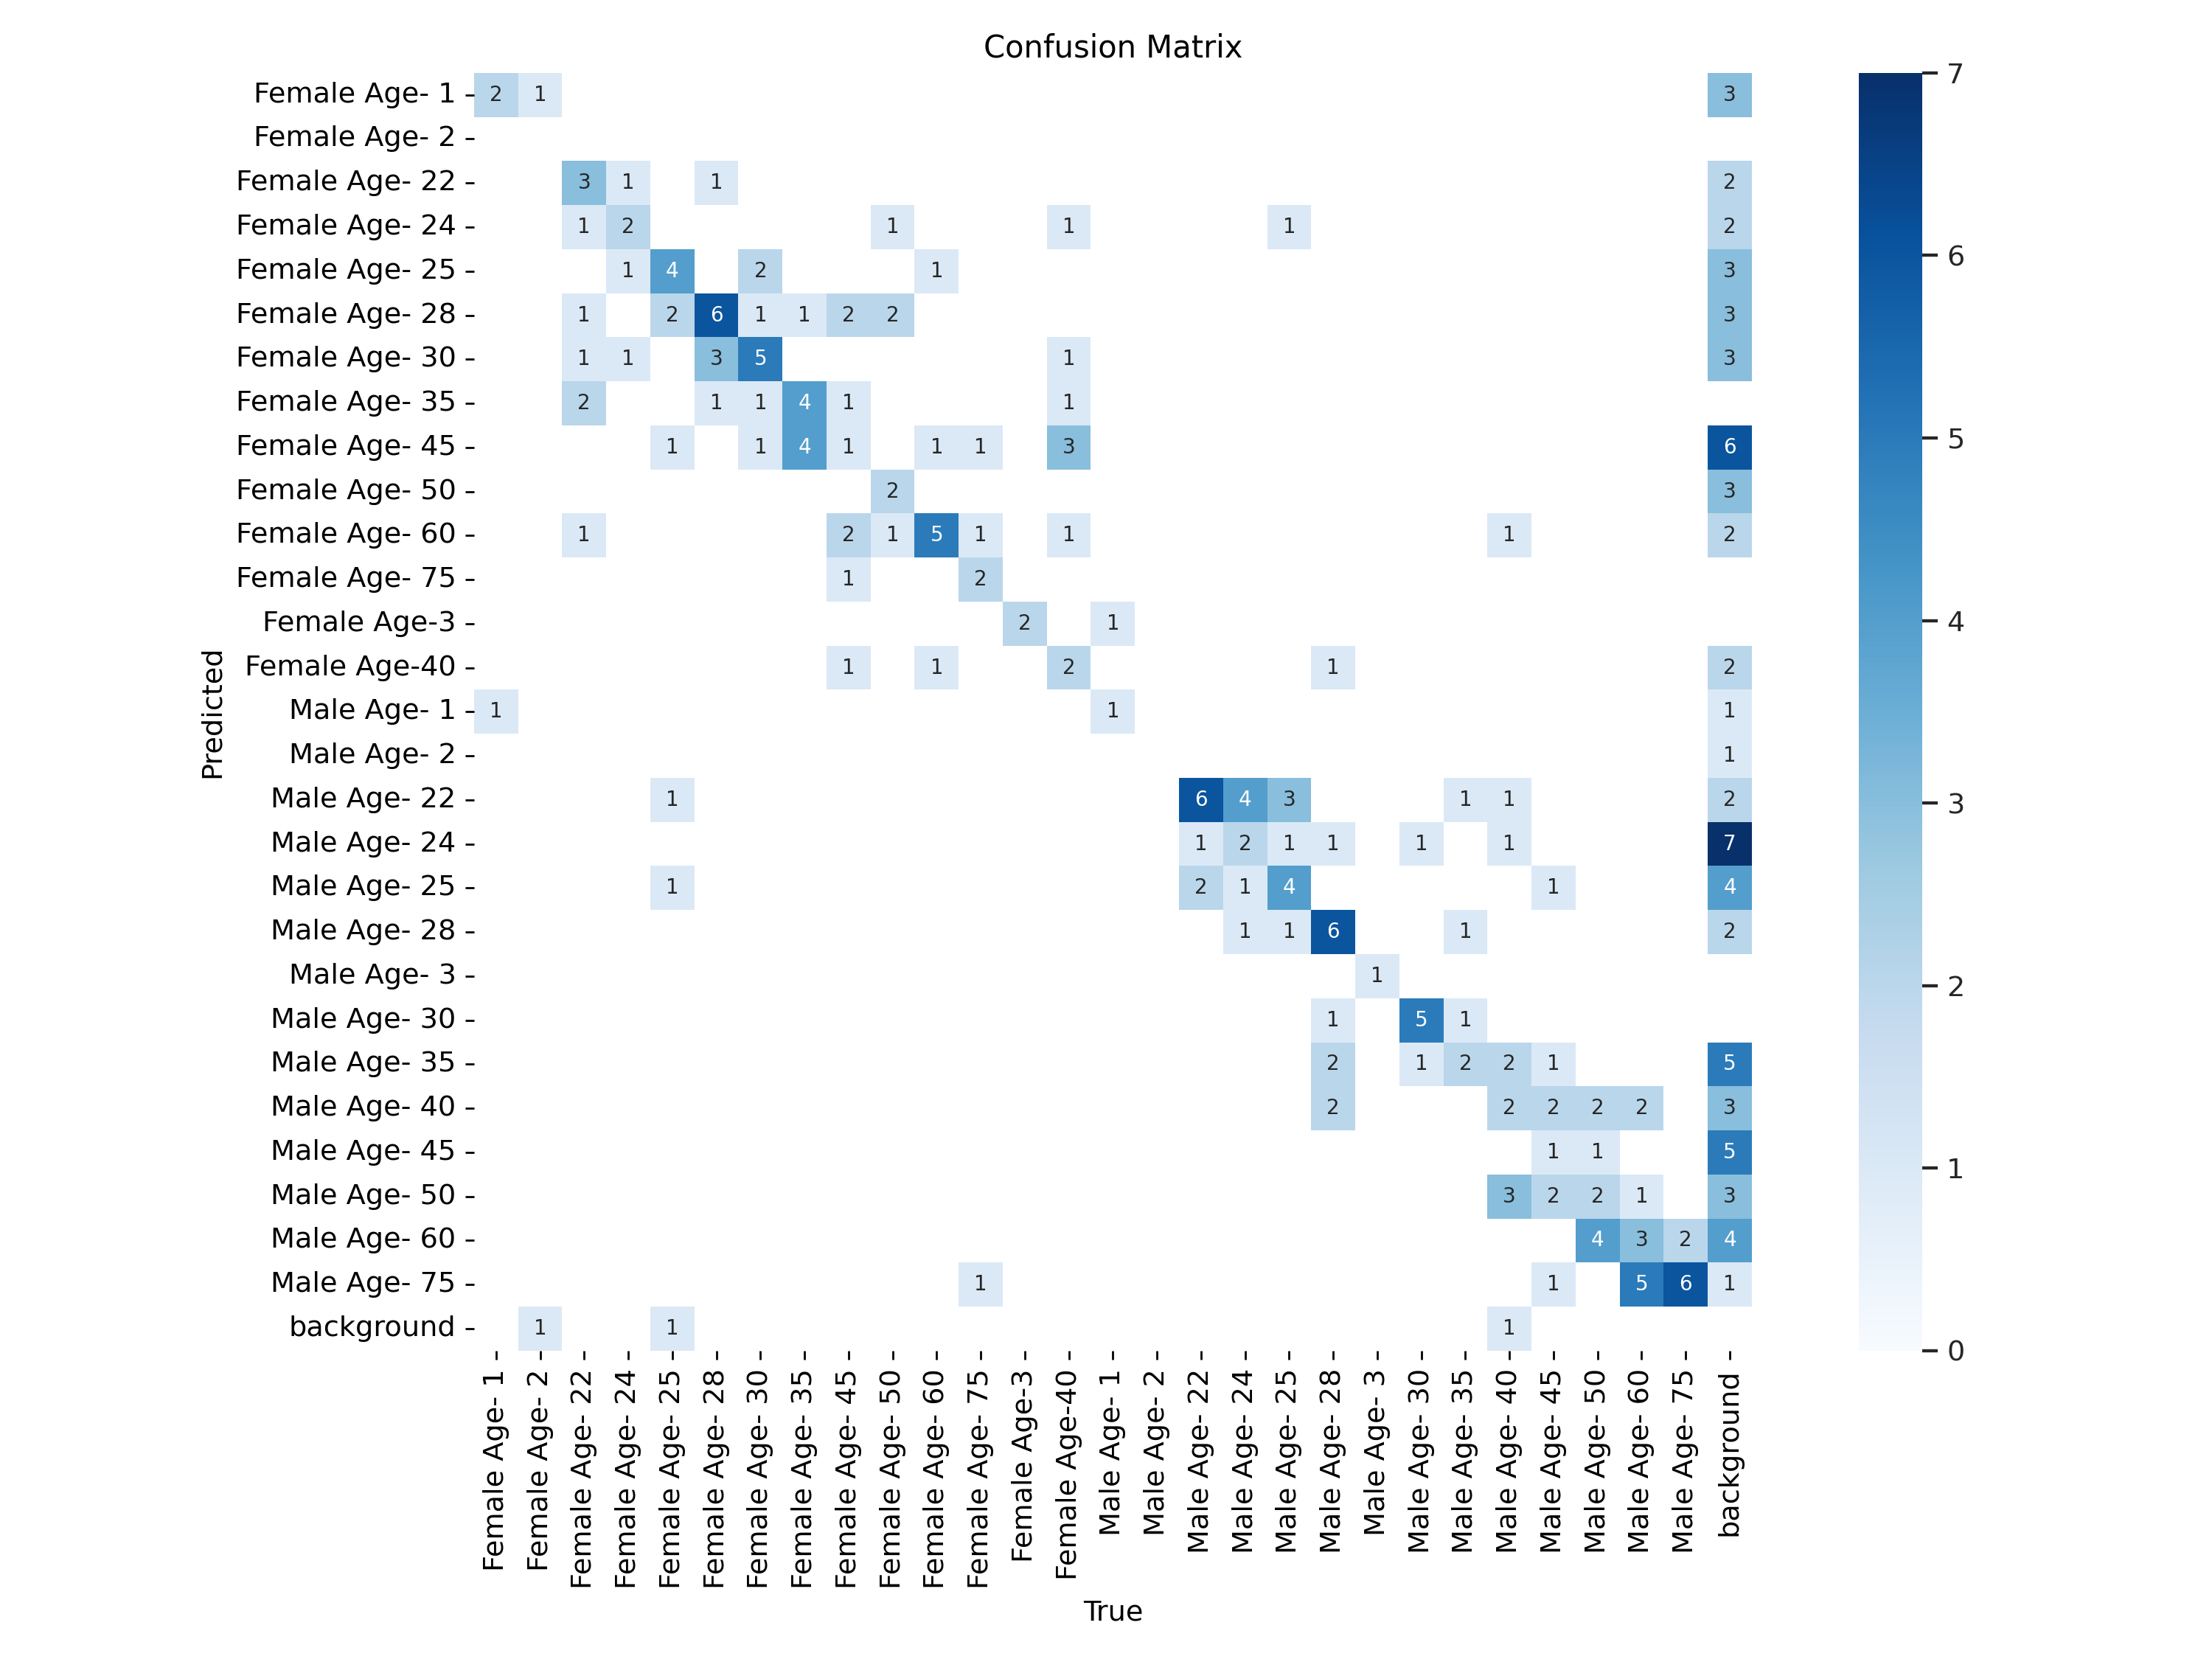

In [7]:
Image(filename=f'/content/runs/detect/val/confusion_matrix.png' , width=600)

In [9]:
!yolo task=detect mode=predict model=/content/run/best_f.pt conf=0.5 source=/content/Gender_Age-2/test/images

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43628196 parameters, 0 gradients, 164.9 GFLOPs

image 1/129 /content/Gender_Age-2/test/images/1-1359-_jpg.rf.ac5322ca1002c2c5eba5ed7c5be30cd7.jpg: 640x640 1 Male Age- 24, 58.5ms
image 2/129 /content/Gender_Age-2/test/images/1-30-_jpg.rf.65e822b627c35484f3440086a8f0941f.jpg: 640x640 (no detections), 48.7ms
image 3/129 /content/Gender_Age-2/test/images/1_0_0_20161219191012803-jpg-chip_jpg.rf.664797103b35a637cc828b7ff97b1d44.jpg: 640x640 1 Female Age- 1, 48.6ms
image 4/129 /content/Gender_Age-2/test/images/1_0_0_20161219193326339-jpg-chip_jpg.rf.aea0098a54e8db89050737350cfc8509.jpg: 640x640 1 Male Age- 1, 48.6ms
image 5/129 /content/Gender_Age-2/test/images/1_0_0_20161219205817093-jpg-chip_jpg.rf.058efdbd7d7dcbf4918c367d38124f43.jpg: 640x640 1 Male Age- 1, 44.2ms
image 6/129 /content/Gender_Age-2/test/images/22_0_0_20170110232146790-jpg-chip_jpg.rf.2f1106230f26997cc82

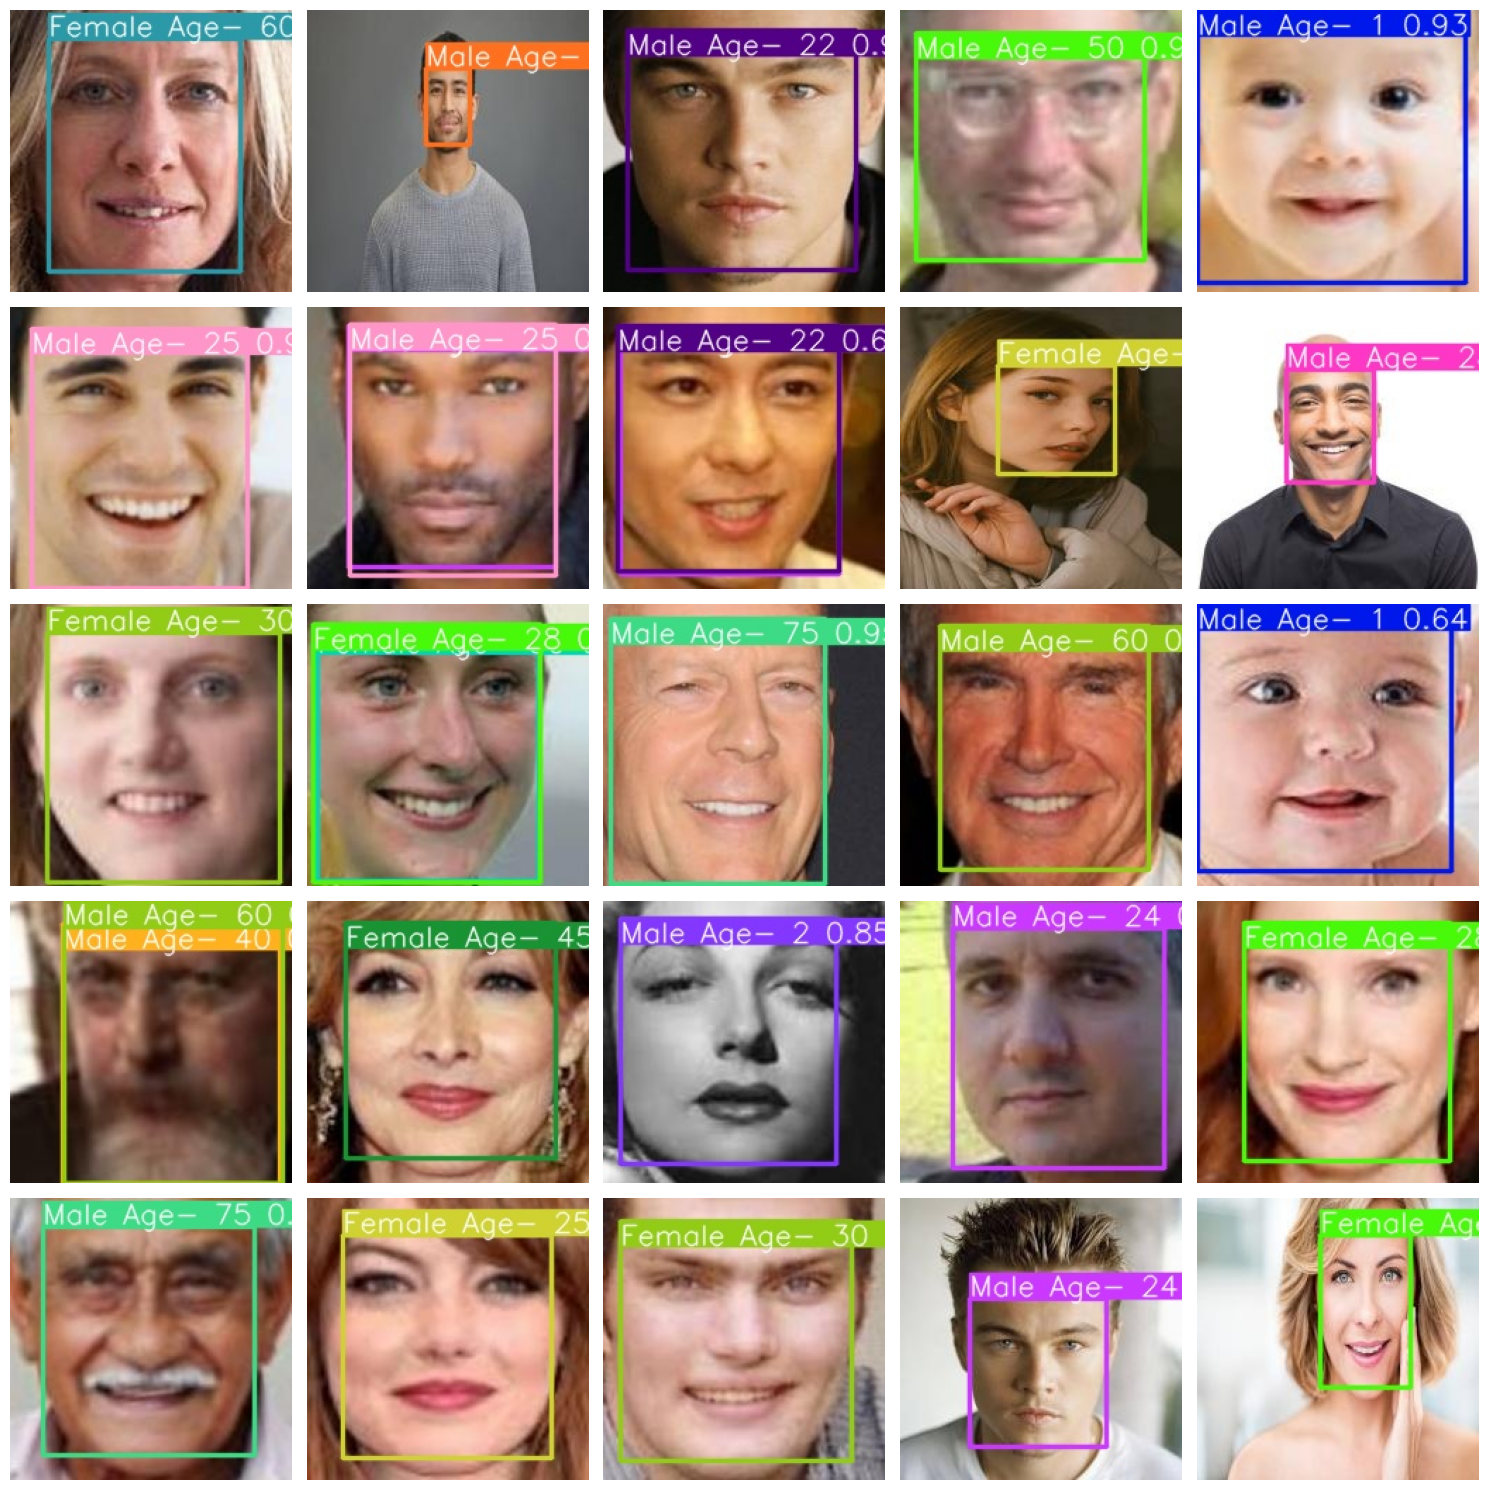

In [16]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = glob.glob(f'/content/runs/detect/predict/*.jpg')[:25]
images = [mpimg.imread(path) for path in image_paths]

fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 15))  # Adjust figsize as needed

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')  # Remove axes for cleaner display

plt.tight_layout()  # Adjust spacing between images
plt.show()



In [34]:
!yolo task=detect mode=predict model=/content/run/best_f.pt conf=0.5 source=/content/our_images

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43628196 parameters, 0 gradients, 164.9 GFLOPs

image 1/5 /content/our_images/adballa1.jpg: 608x640 1 Male Age- 22, 129.0ms
image 2/5 /content/our_images/ahmed.jpg: 640x608 1 Male Age- 22, 1 Male Age- 24, 70.9ms
image 3/5 /content/our_images/ahmed1.jpg: 640x448 1 Male Age- 22, 92.2ms
image 4/5 /content/our_images/assma2.jpg: 640x480 1 Female Age- 24, 136.9ms
image 5/5 /content/our_images/nancy1.jpg: 640x384 1 Female Age- 25, 90.7ms
Speed: 2.7ms preprocess, 103.9ms inference, 116.6ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


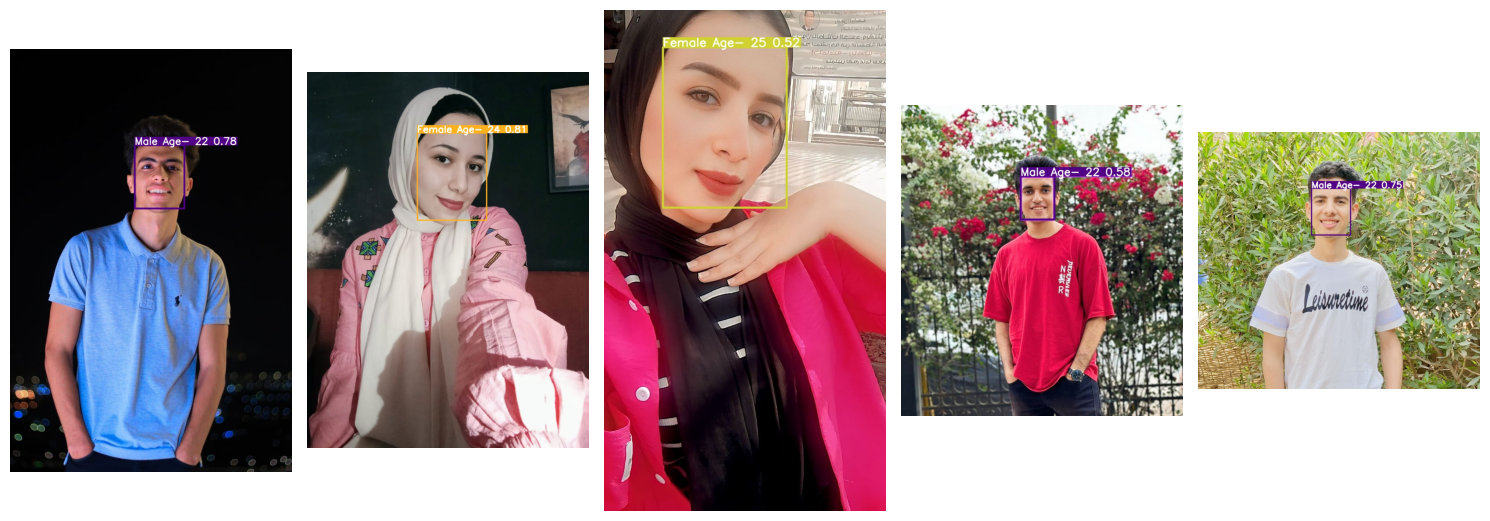

In [37]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_paths = glob.glob(f'/content/runs/detect/predict7/*.jpg')[:25]
images = [mpimg.imread(path) for path in image_paths]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))  # Adjust figsize as needed

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')  # Remove axes for cleaner display

plt.tight_layout()  # Adjust spacing between images
plt.show()


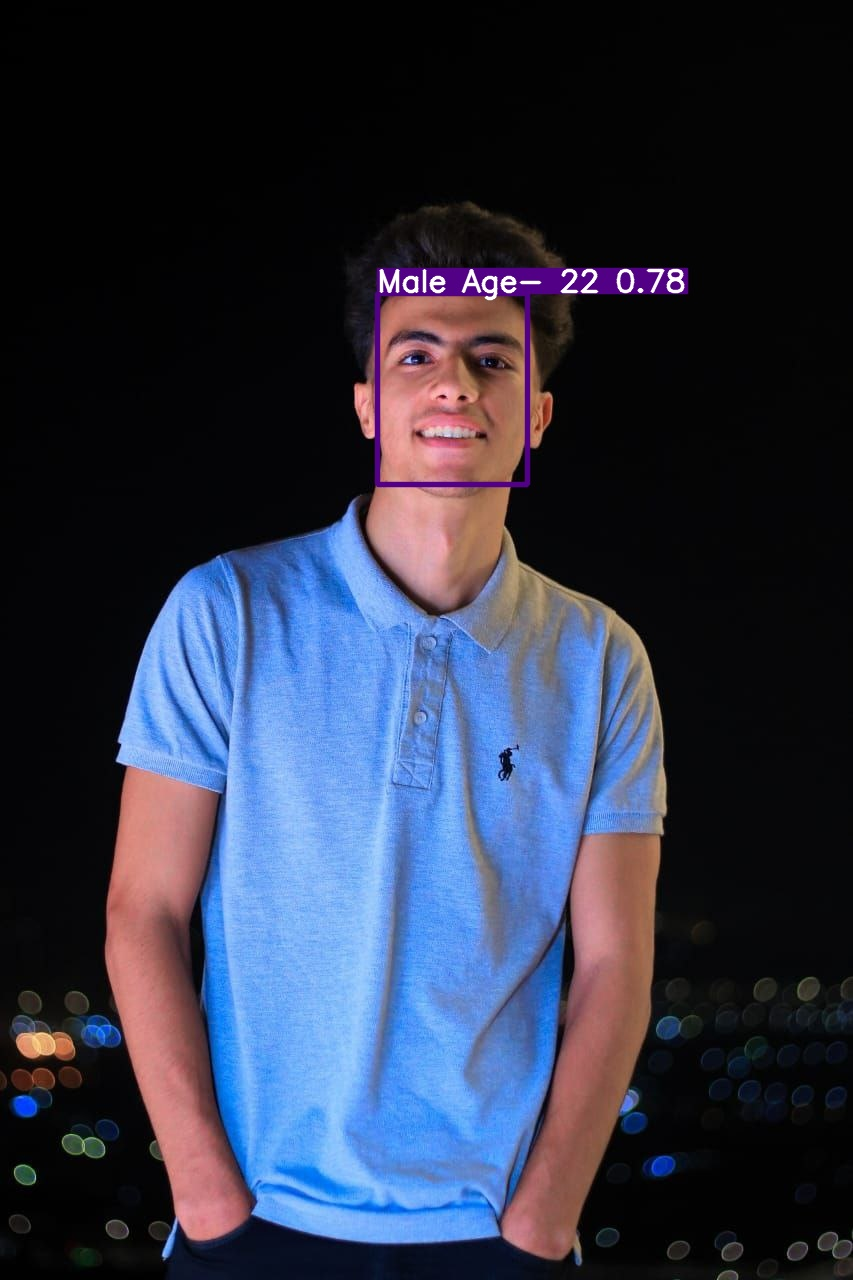

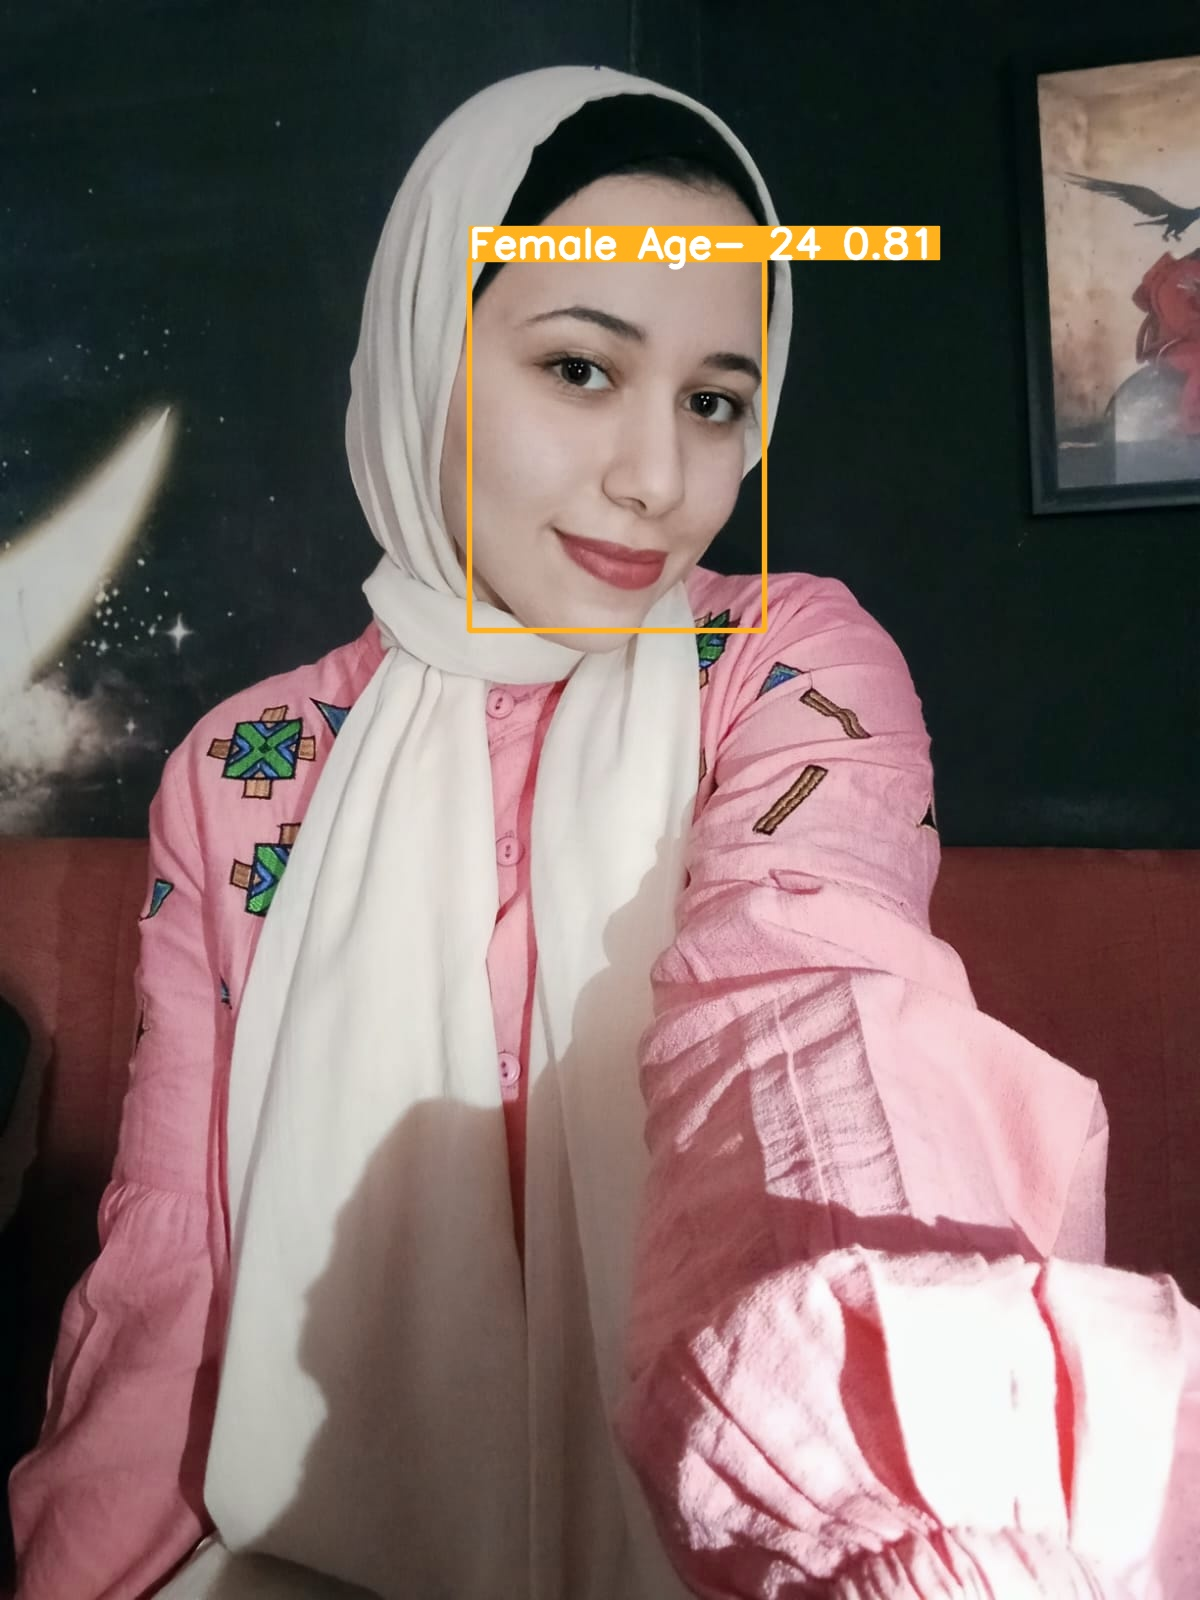

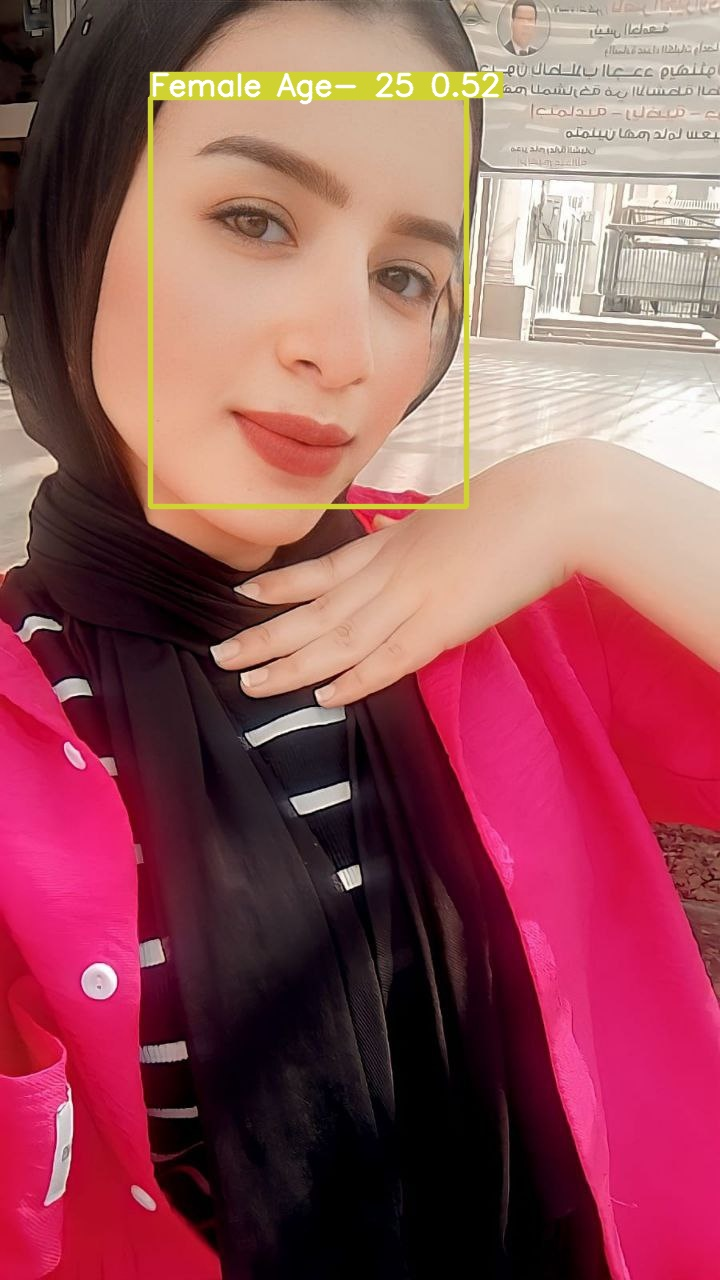

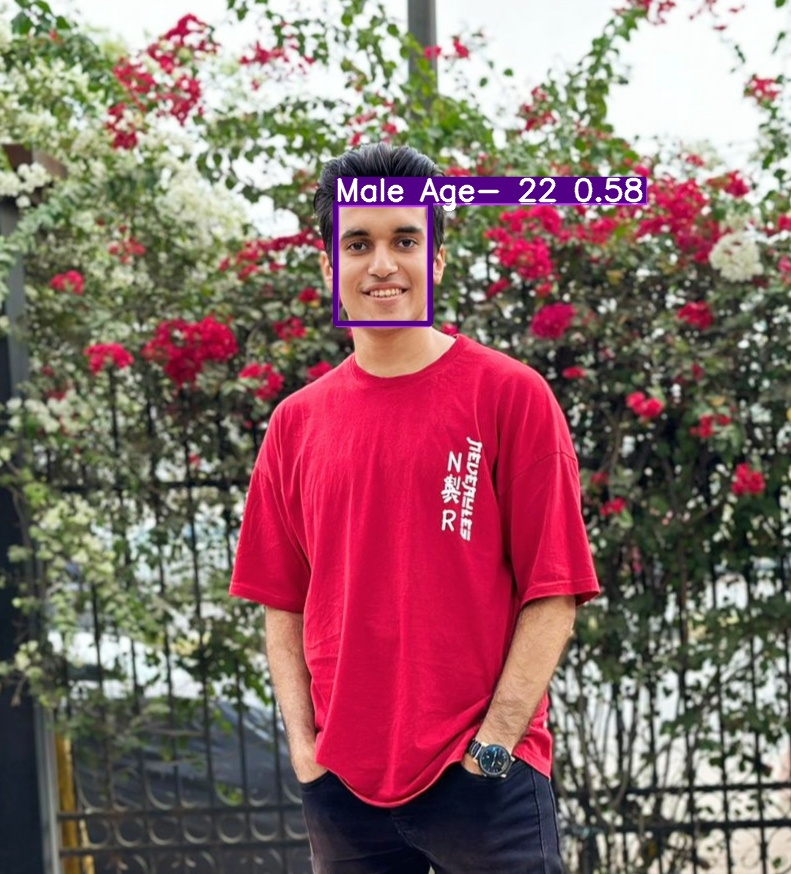

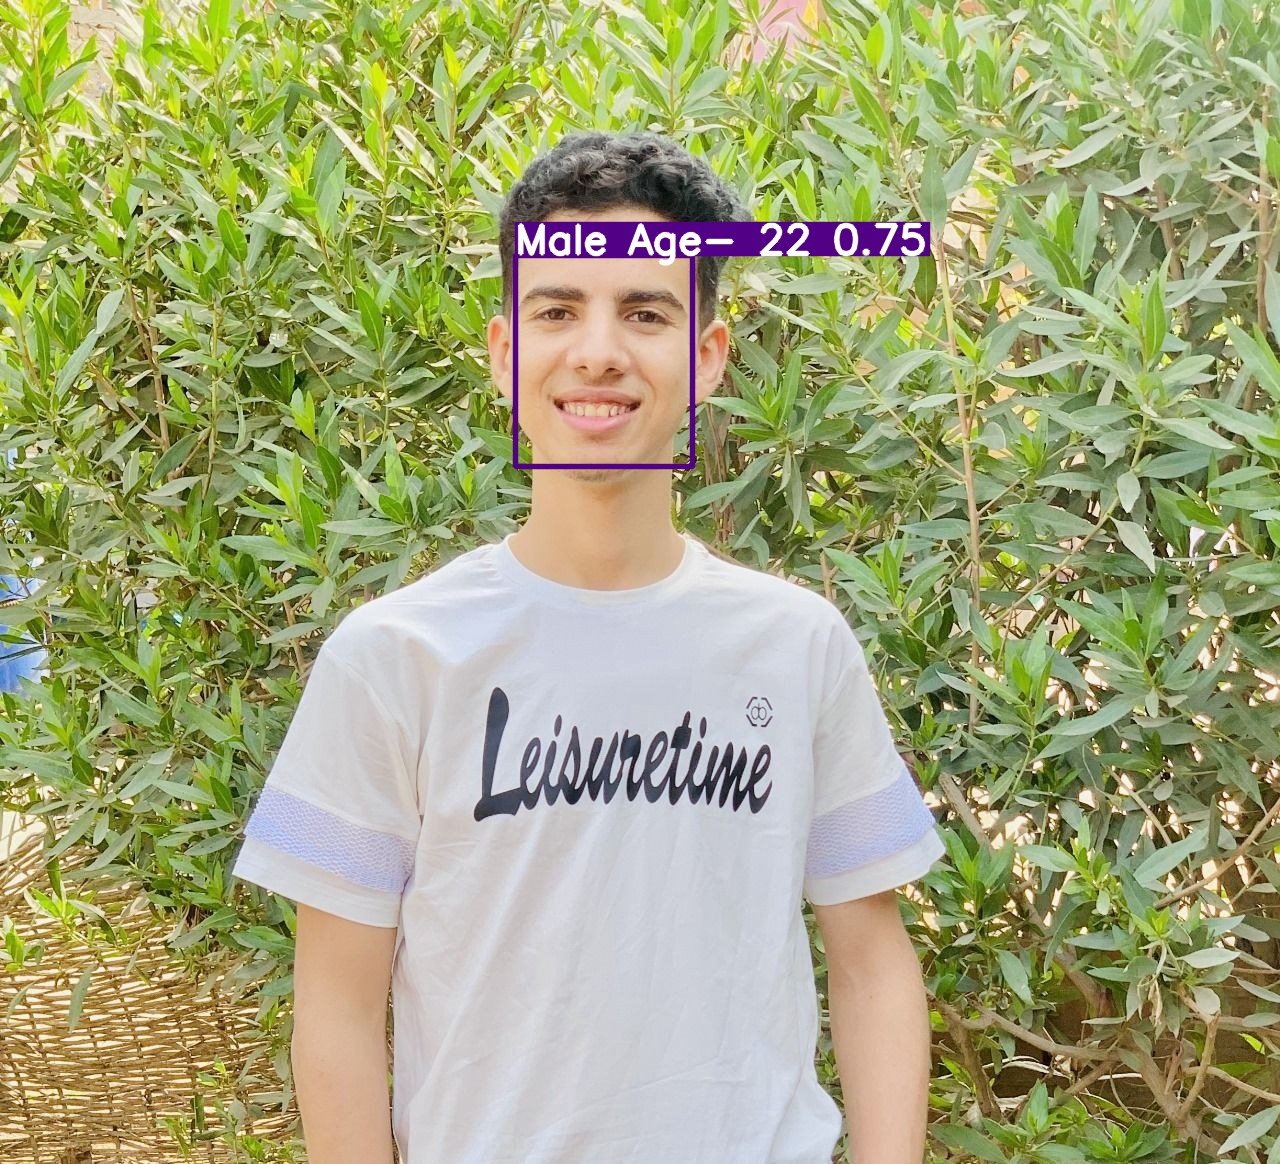

In [35]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict7/*.jpg')[:5]:
      display(Image(filename=image_path, width=600))
      print("\n")

#  face_recognition

In [13]:
import cv2
import numpy as np
import face_recognition
import os
from datetime import datetime

In [14]:
pwd     

'C:\\Users\\hp'

In [15]:
path = 'img'
images = []
classNames = []
myList = os.listdir(path)
print(myList)

['Abdullah.jpg', 'ahmed_hassan.jpg', 'ahmed_hussien.jpg', 'assma.jpg', 'cr7.webp', 'mask.jpg', 'messi.jpg', 'nancy.jpg', 'treka.jpeg']


In [16]:
for cl in myList:
    curImg = cv2.imread(f'{path}/{cl}')
    images.append(curImg)
    classNames.append(os.path.splitext(cl)[0])
print(classNames)

['Abdullah', 'ahmed_hassan', 'ahmed_hussien', 'assma', 'cr7', 'mask', 'messi', 'nancy', 'treka']


In [17]:
def findEncodings(images):
    encodeList = []
    for img in images:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        encode = face_recognition.face_encodings(img)[0]
        encodeList.append(encode)
    return encodeList

In [18]:
def markAttendance(name):
    with open('Attendance.csv','r+') as f:
        myDataList = f.readlines()
        nameList = []
        for line in myDataList:
            entry = line.split(',')
            nameList.append(entry[0])
        if name not in nameList:
            now = datetime.now()
            dtString = now.strftime('%H:%M:%S')
            f.writelines(f'\n{name},{dtString}')
        

encodeListKnown = findEncodings(images)
print('Encoding Complete')


Encoding Complete


In [19]:
cap = cv2.VideoCapture(0)
frame_resizing = 0.25

while True:
    success, img = cap.read()
    imgS = cv2.resize(img, (0, 0), fx=frame_resizing, fy=frame_resizing)
    imgS = cv2.cvtColor(imgS, cv2.COLOR_BGR2RGB)
 
    facesCurFrame = face_recognition.face_locations(imgS)
    encodesCurFrame = face_recognition.face_encodings(imgS,facesCurFrame)
 
    for encodeFace,faceLoc in zip(encodesCurFrame,facesCurFrame):
        matches = face_recognition.compare_faces(encodeListKnown,encodeFace)
        print('matches',matches)
        faceDis = face_recognition.face_distance(encodeListKnown,encodeFace)
        print(faceDis)
        matchIndex = np.argmin(faceDis)
        if matches[matchIndex]:
            name = classNames[matchIndex].upper()
            print(name)
            
            faceLoc = np.array(faceLoc)
            faceLoc = faceLoc / 0.25
            faceLoc=faceLoc.astype(int)
            #y1,x2,y2,x1 = faceLoc # in the other code we risize the face
            #y1, x2, y2, x1 = y1*4,x2*4,y2*4,x1*4
            y1, x2, y2, x1 = faceLoc[0], faceLoc[1], faceLoc[2], faceLoc[3]
         
            cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)
            cv2.rectangle(img,(x1,y2-35),(x2,y2),(0,255,0),cv2.FILLED)
            cv2.putText(img,name,(x1+6,y2-6),cv2.FONT_HERSHEY_COMPLEX,1,(255,255,255),2)
            markAttendance(name)
 
    cv2.imshow('Webcam',img)
    key = cv2.waitKey(1)
    if key == 27:
        break
cap.release()
cv2.destroyAllWindows()

matches [True, False, True, False, False, False, False, False, False]
[0.4599774  0.7268698  0.56757828 0.84684884 0.69564394 0.85751771
 0.84610381 0.81502288 0.74505146]
ABDULLAH
matches [True, False, False, False, False, False, False, False, False]
[0.54868114 0.73275284 0.70657199 0.84334987 0.69623548 0.86583791
 0.75938423 0.84239513 0.67840812]
ABDULLAH
matches [True, False, False, False, False, False, False, False, False]
[0.57366499 0.74228357 0.72171422 0.86833144 0.72274064 0.92536489
 0.80547207 0.86986059 0.67366652]
ABDULLAH
matches [True, False, False, False, False, False, False, False, False]
[0.51883107 0.71600726 0.66489032 0.83146933 0.6947279  0.85808049
 0.83970288 0.85235997 0.6706192 ]
ABDULLAH
matches [True, False, False, False, False, False, False, False, False]
[0.49743313 0.72244442 0.67406976 0.83909918 0.69632553 0.88203099
 0.83220705 0.83138171 0.69712655]
ABDULLAH
matches [True, False, False, False, False, False, False, False, False]
[0.47240451 0.727957